In [3]:
#import necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
import pandas as pd
from math import sqrt

#download data price data into DataFrame
data =  pd.read_csv('SET2014.csv',index_col=None, header=0)
data['Date'] = pd.to_datetime(data['Date'])#, format='%Y%m%d')
data = data.set_index(['Date'])
print(data.shape)
print(data.columns)
print()

#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (data.index[-1] - data.index[0]).days
cagr = ((((data['Close'][-1]) / data['Close'][1])) ** (365.0/days)) - 1
print ("CAGR ={:0.2f} %".format(cagr*100))

mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns
data['Returns'] = data['Close'].pct_change()
vol = data['Returns'].std()*sqrt(252)
print ("Annual Volatility = {:0.2f} %".format(vol*100))

(1249, 6)
Index(['Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

CAGR =5.85 %
Annual Volatility = 11.93 %


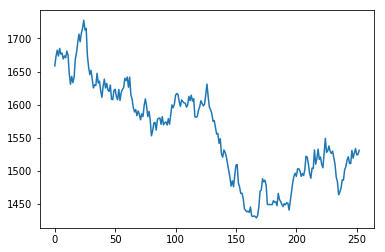

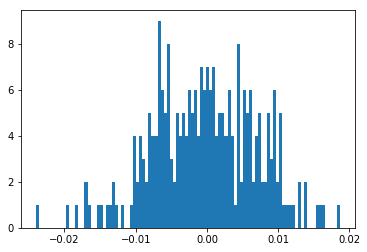

In [9]:
#Define Variables
S = data['Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = cagr # 0.2309 #Return
vol = vol  # 0.4259 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

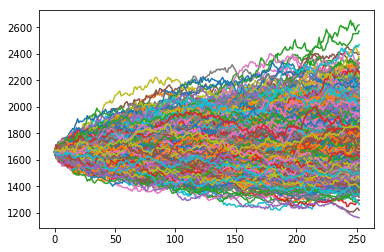

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

#Define Variables
S = data['Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = cagr # 0.2309 #Return
vol = vol  # 0.4259 #Volatility

#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)

#show the plot of multiple price series created above
plt.show()